In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2 
import os

# Visualizing Data Sample

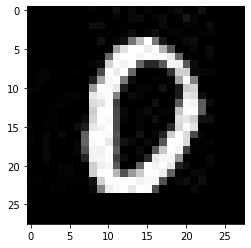

In [24]:
img = cv2.imread('./trainingSet/trainingSet/0/img_28920.jpg')
plt.imshow(img)

In [25]:
img.shape

(28, 28, 3)

# Defining Helper Functions

In [138]:
#removes noise and converts bgr to binary image
def img_to_val(img):
    r = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # removing noice values from the image
    ret, r = cv2.threshold(r,180,255,cv2.THRESH_BINARY)
    r = r.reshape(r.shape[0]*r.shape[1])
    return r

In [139]:
def readall_img_names(folder):
    loc_list = []
    for file_name in os.listdir(folder):
        loc_list.append(os.path.join(folder,file_name))
    return loc_list

In [4]:
def build_df():
    col_list = ['label']+list(range(784))
    df = pd.DataFrame(columns=col_list)
    for i in range(10):
        path = './trainingSet/trainingSet/'+str(i)+'/'
        loc_list = readall_img_names(path)
        for loc in loc_list:
            img = cv2.imread(loc)
            r = [str(i)]
            r=r+list(img_to_val(img))
            df.loc[len(df)] = r
    df.to_csv('trainingSet.csv')
    return df

# Converting images to Structured Data

In [5]:
build_df()

# Reading the Converted data

In [9]:
data = pd.read_csv('./trainingSet.csv')

In [10]:
data.head()

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.shape

(7000, 786)

In [12]:
print(data.isna().sum())

Unnamed: 0    0
label         0
0             0
1             0
2             0
             ..
779           0
780           0
781           0
782           0
783           0
Length: 786, dtype: int64


In [13]:
data = data.drop(columns=['Unnamed: 0'],axis=1)

In [14]:
data = data.replace(to_replace=255,value=1)

In [15]:
data.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.to_csv('cleaned_data.csv')

# Reading simplified data

In [3]:
data = pd.read_csv('./cleaned_data.csv')

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
def plot_freq(num,data):
    d=data[data['label']==num].drop(['label'],axis=1)
    t=d.sum()
    t.plot(kind='area',x='sum',y='pixel',colormap='rainbow')

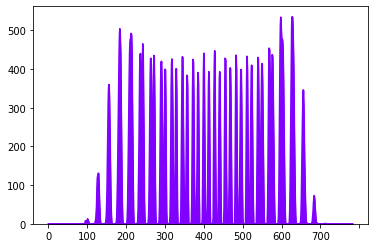

In [6]:
plot_freq(0,data)

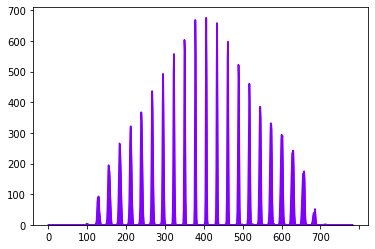

In [7]:
plot_freq(1,data)

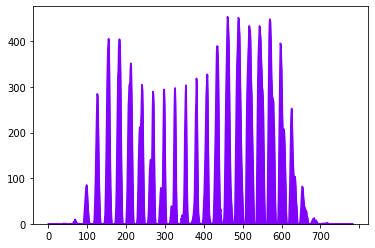

In [8]:
plot_freq(2,data)

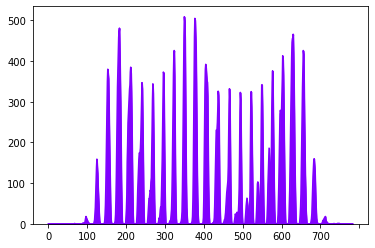

In [9]:
plot_freq(3,data)

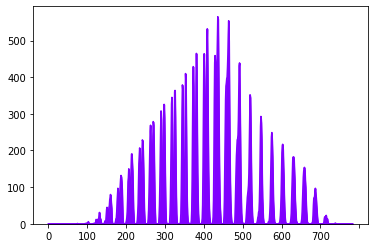

In [10]:
plot_freq(4,data)

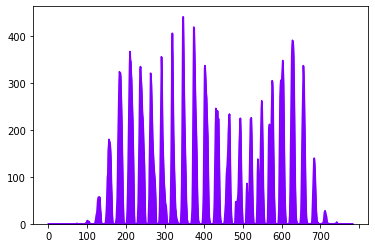

In [11]:
plot_freq(5,data)

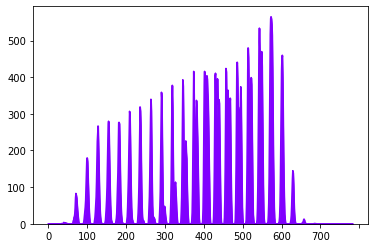

In [12]:
plot_freq(6,data)

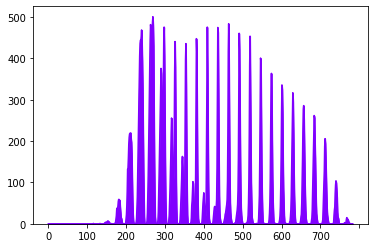

In [13]:
plot_freq(7,data)

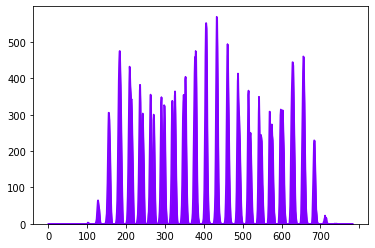

In [14]:
plot_freq(8,data)

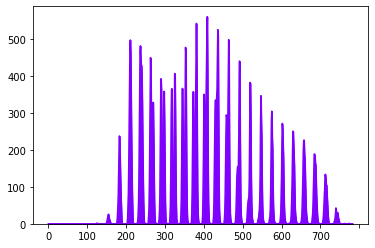

In [15]:
plot_freq(9,data)

In [16]:
x = data.drop(columns=['label'],axis=1)
y = data['label']

In [17]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [19]:
svc = SVC()

In [20]:
svc.fit(x,y)

SVC()

In [21]:
svc.score(x,y)

0.9881428571428571

In [22]:
test_data = pd.read_csv('./testSet.csv')

In [23]:
test_data = test_data.drop(columns=['Unnamed: 0'],axis=1)

In [24]:
x_test = test_data.drop(columns=['label'],axis=1)
y_test = test_data['label']

In [25]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
595    9
596    9
597    9
598    9
599    9
Name: label, Length: 600, dtype: int64

In [27]:
svc.score(x_test,y_test)

0.9733333333333334

# Custom tests

In [85]:
img = cv2.imread('./img.png')

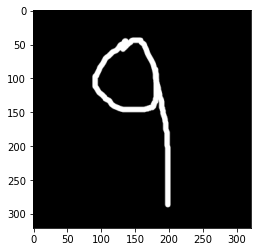

In [86]:
plt.imshow(img)

In [87]:
img = cv2.resize(img,(28,28))

In [88]:
img.shape

(28, 28, 3)

In [89]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [90]:
ret, img = cv2.threshold(img,180,255,cv2.THRESH_BINARY)

In [91]:
img = img.reshape(img.shape[0]*img.shape[1])

In [92]:
d = pd.DataFrame(columns=range(784))

In [93]:
d.loc[len(d)] = img

In [94]:
d=d.replace(to_replace=255,value=1)

In [95]:
d

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y=svc.predict(d)

In [97]:
y

array([9], dtype=int64)